## 【問題1】断面図の作成

In [45]:
import numpy as np
import matplotlib.pyplot as plt


np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)


In [46]:
fuji[:, 0]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [49]:
fuji[:, 3]

array([   0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    0.  ,    6.62,
          7.21,   12.2 ,   54.41,  171.56,  177.84,  228.21,  275.38,
        433.76,  371.74,  380.06,  503.4 ,  485.39,  477.82,  580.5 ,
        610.92,  654.96,  628.22,  626.64,  572.55,  723.95,  701.94,
        879.47,  976.17,  919.16,  817.  ,  743.06,  770.92,  864.06,
        826.52,  748.39,  756.11,  724.5 ,  724.5 ,  724.5 ,  724.5 ,
        724.5 ,  724.5 ,  724.5 ,  724.5 ,  724.5 ,  724.5 ,  852.18,
        851.36,  831.  ,  880.44,  955.14,  849.52,  831.6 ,  790.01,
        738.97,  848.83,  738.3 ,  736.48,  672.24,  564.02,  552.23,
        497.41,  558.28,  503.02,  462.33,  469.66,  429.49,  454.21,
        412.27,  362.29,  355.68,  368.91,  371.04,  371.19,  377.62,
        386.64,  390.14,  418.41,  420.6 ,  443.  ,  458.66,  471.82,
        488.4 ,  505.1 ,  519.54,  536.54,  553.64,  575.07,  588.99,
        602.36,  613.04,  631.71,  660.43,  672.36,  700.15,  725.72,
        741.17,  753

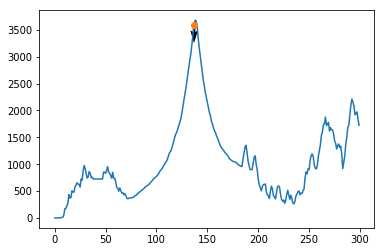

In [87]:
# 断面図を作成
plt.plot(fuji[:, 0], fuji[:, 3])
plt.plot(fuji[:, 0][137], fuji[:, 3][137], marker="o")
plt.quiver(fuji[:, 0][137], fuji[:, 3][137], fuji[:, 0][136]-fuji[:, 0][137], fuji[:, 3][136]-fuji[:, 3][137])

## 【問題2】勾配の計算の関数

input データ、今いる地点x

def 引数x
    x-1
    データの探索：、xの時のy、x-1の時のy-1
    return　yの変化量/x変化量

output　勾配


In [51]:
def calculate_gradient(current_point):
    """
    
    Palameters
    ----------
    current_point:int　現地点x
    current_elevation:int　現地点xでの標高
    next_point:int　次点x-1
    next_elevation:int 次点x-1での標高
    
    Return
    ----------
    勾配
    
    """
    current_elevation = fuji[current_point-1,3]
    next_point = current_point - 1
    next_elevation = fuji[next_point-1, 3]
    return (next_elevation - current_elevation) / (next_point - current_point)

In [52]:
calculate_gradient(136)

178.42999999999984

## 【問題3】勾配降下法の関数を作成

「移動すべき地点 = 今いる地点 - α ×今いる地点の勾配」  

input 現地点x、パラメータα

def 引数x、パラメータα  
    リストを用意  
    移動すべき地点 = x -α×今いる地点の勾配 で更新。(初期値は更新しない) 
    移動すべき地点を四捨五入  
    移動すべき地点から標高を算出
    標高をリストに追加
    return リストを抽出
output リスト

In [128]:
from decimal import Decimal, ROUND_HALF_UP, ROUND_HALF_EVEN
import math

def calculate_moving_point(current_point, alpha=0.1):
    elevation_list = []
    
    for i in range(100):
        if i == 0:
            current_elevation = fuji[current_point, 3]
        else:
            # 現時点を更新する。
            current_point -= alpha*calculate_gradient(current_point)
            
            #  移動すべき点（current_point）を四捨五入
            current_point = int(Decimal(str(current_point)).quantize(Decimal('0'), rounding=ROUND_HALF_UP))
            
            # 移動すべき点から標高を算出
            current_elevation = fuji[current_point, 3]
        
        # リストに追加
        elevation_list.append(current_elevation)
    
    return elevation_list

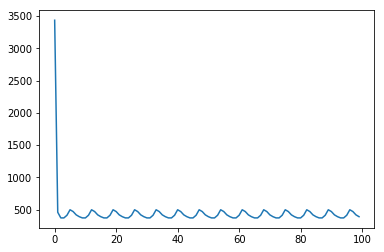

In [129]:
plt.plot(calculate_moving_point(136, 0.3))

## 【問題4】初期値の変更

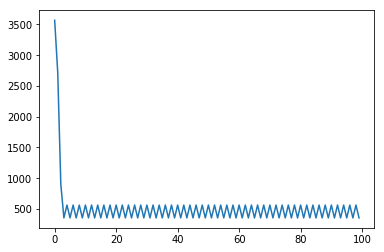

In [130]:
plt.plot(calculate_moving_point(140, 0.3))